<a href="https://colab.research.google.com/github/Lidiamir/ExemplosML/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a Árvore de Decisão


A árvore de decisão (do inglês *decision tree*) é um método de aprendizado supervisionado usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino, aprendendo regras de decisão simples, inferidas a partir de um conjunto de dados (do inglês *dataset*).

Para melhor compreensão, vamos apresentar um exemplo de uso da técnica de árvore de decisão em um problema de classificação. No exemplo, a árvore será capaz de diferenciar três espécie de flores (setosa, versicolor e virginica) a partir de suas características. Para aprender como diferenciar uma flor da outra, primeiramente, o algoritmo que implementa a técnica é apresentado a um conjunto de dados históricos em que constam registros das características (comprimento da sépala, largura da sépala, comprimento da pétala, largura da pétala) e espécie de diversas flores. A partir desses dados o algoritmo consegue aprender quais os elementos mais marcantes de cada tipo de flor. O resultado desse aprendizado, também conhecido como modelo, é agora capaz de classificar novas flores utilizando para isso somente os dados correspondentes às características da flor.  

É importante ressaltar que a árvore de decisão aprende sobre dados rotulados, isto é, dados que possuem alguma classificação/organização previamente feita. As técnicas que demandam rotulação prévia dos dados são chamadas de técnicas de aprendizado supervisionado.

A árvore de decisão pode ser muito útil auxiliando na compreensão dos dados e evidenciando os principais elementos diferenciadores entre as classes de um conjunto de dados.

## Exemplo

Existem muitas bibliotecas Python que disponibilizam conjuntos de dados prontos de forma a facilitar a aplicação de novas técnicas e também auxiliar em novos desenvolvimentos. No nosso exemplo, utilizaremos o *dataset* [iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) disponibilizado pela biblioteca [Scikit Learn](https://scikit-learn.org/stable/index.html), uma biblioteca conhecida de aprendizado de máquina em Python.

No *dataset*, constam 150 registros de flores, 50 registros de cada espécie. Em cada registro, constam as características (parâmetros) e a espécie (classe) da flor.

# Nova seção

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris() # Carrega o dataset iris
X, y = iris.data, iris.target # Parâmetros e rótulos das flores catalogadas

print("Quantidade de registros: " + str(len(iris.target)))
print("Nome dos parâmetros: "  + str(iris.feature_names))  
print("Parâmetros das 5 primeiras flores:\n" + str(X[0:5]) + "\n")  
print("Nome das classes: " + str(iris.target_names))
print("Classes das 5 primeiras flores:\n" + str(y[0:5]) + "\n")  

Quantidade de registros: 150
Nome dos parâmetros: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Parâmetros das 5 primeiras flores:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Nome das classes: ['setosa' 'versicolor' 'virginica']
Classes das 5 primeiras flores:
[0 0 0 0 0]



Separamos 80% do *dataset* para ensinar (treinar) a árvore de decisão e os outros 20% serão utilizados para posteriormente testar o desempenho modelo treinado, atuando sobre dados novos nunca vistos. 

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123) # Função que divide o dataset

Por se tratar de um problema de classificação, utilizaremos a implementação da técnica de árvore de decisão [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) também disponibilizada pela biblioteca [Scikit Learn](https://scikit-learn.org/stable/index.html) para aprender sobre *dataset* [iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).

In [ ]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(random_state=0) # Criação da árvore de decisão
decision_tree = decision_tree.fit(x_train, y_train) # Treinamento da árvore de decisão com os dados do dataset iris (dados de treinamento)

Durante o aprendizado o método cria uma árvore de decisão, em que cada nó da árvore corresponde a uma validação. Os nós mais altos na árvore representam os parâmetros e valores mais significativos na diferenciação entre uma classe e outra. 

O código abaixo exibe a árvore resultante do aprendizado sobre os dados [iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Cada nó tem algumas informações dentro dele:

```
  petal width (cm) ≤ 0.8  # Validação realizada no nó
  gini = 0.665            # Índice Gini
  samples = 120           # Quantidade de amostras do treinamento que recaem no nó 
  value = [37, 44, 39]    # Quantidade de amostras do treinamento que recaem em cada classe ['setosa' 'versicolor' 'virginica']
  class = versicolor      # Classe predominante daquele nó com base em value 

```

A cor do nó corresponde à cor da classe que mais o representa, quanto mais escura a cor, maior a proporção de elementos daquela classe estão presentes na amostra.  

A partir da estrutura da árvore é possível aprender bastante sobre o conjunto de dados. Nesse caso, o primeiro nó e o nó logo abaixo dele usam o parâmetro largura da pétala (*petal width (cm)*) na validação, indicando que a largura das pétalas é um parâmetro significativo na diferenciação entre as três espécies. Esse argumento fica ainda mais forte, quando vemos que foi possível separar as flores do tipo *setosa* (nó cor laranja) das outras somente com a verificação feita no primeiro nó, que avalia se a largura da pétala é menor ou igual a 0,8 (*petal width (cm) ≤ 0.8*). Pela árvore também é possível observar uma intersecção maior entre as características das flores do tipo *versicolor* e *virginica*, pois são necessárias várias validações para separá-las umas das outras.

Por isso, técnica de árvore de decisão é útil não só na automatização do processo de classificação ou regressão, como também para compreensão dos dados.

Para a visualização da estrutura da árvore foi utilizada a biblioteca [Graphviz](https://graphviz.org/).

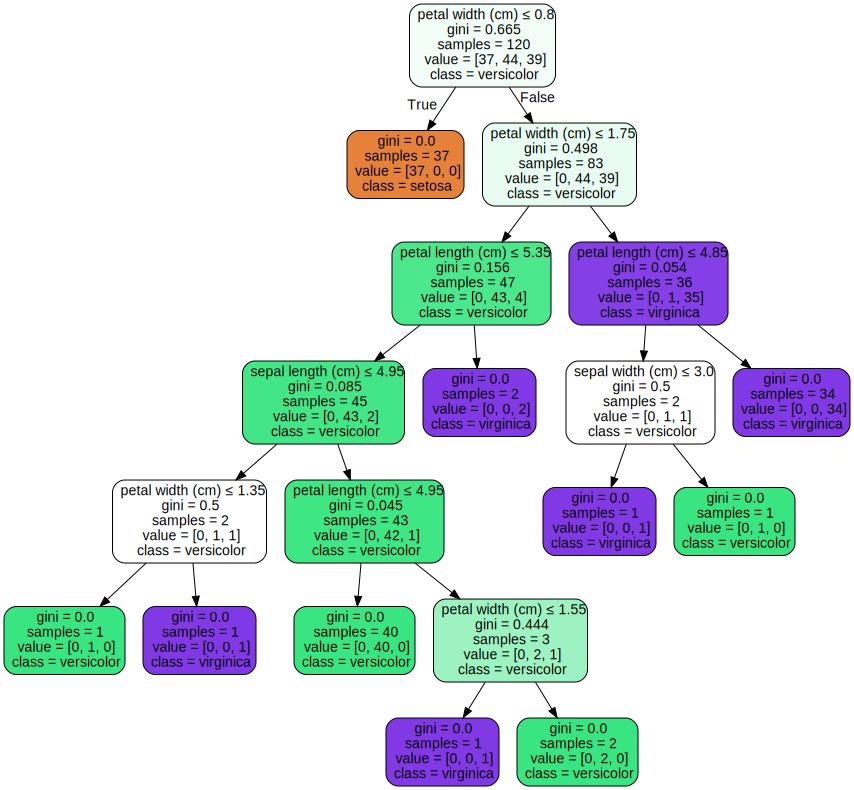

In [ ]:
import graphviz 

dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Também é possível exporta o gráfico para o formato pdf.

In [ ]:
graph.render("iris") 

'iris.pdf'

Alternativamente, a árvore também pode ser exportada em formato textual com a função export_text do [Scikit Learn](https://scikit-learn.org/stable/index.html). Este método dispensa a instalação de bibliotecas externas e é mais compacto:

In [ ]:
from sklearn.tree import export_text

r = export_text(decision_tree, feature_names=iris['feature_names'])
print(iris['feature_names'])
print(r)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- sepal length (cm) <= 4.95
|   |   |   |   |--- petal width (cm) <= 1.35
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal width (cm) >  1.35
|   |   |   |   |   |--- class: 2
|   |   |   |--- sepal length (cm) >  4.95
|   |   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.00
|   |   |   |   |--- class: 2
|   | 

Para testar se a árvore criada realmente aprendeu bem, testamos o desempenho dela sobre os dados de teste. Usamos a árvore treinada para prever as classes das flores no *dataset* de teste e comparamos a previsão com a real classificação da flor. 

In [ ]:
from sklearn.metrics import confusion_matrix

y_prediction = decision_tree.predict(x_test) # Predições a partir dos parâmetros dos dados de teste
cm = confusion_matrix(y_test, y_prediction)	# Comparação da predição com a classificação real 
print("Confusion Matrix: \n",  cm)

Confusion Matrix: 
 [[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]


Para comparar a previsão do algoritmo com a real classificação da flor usamos uma estrutura chamada matriz de confusão. Cada eixo da matriz exibe as classificações reais (*True Labels*) e a classificação feita pelo algoritmo (*Predicted Label*). Nas células ficam os quantitativos de flores que recaem naquelas classificações. A diagonal representa os elementos para os quais a classificação real coincide com a predição feita pelo algoritmo.

Nesse exemplo, a árvore acertou a classificação de todas as flores no *dataset* de testes, indicando que ela aprendeu bem as características que diferenciam uma espécie de outra.

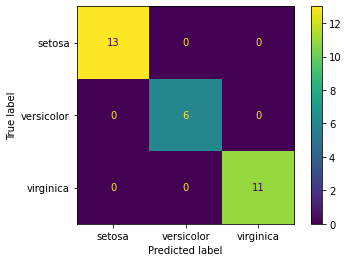

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)

disp.plot()
plt.show()